# Тема “Обучение без учителя”

## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import warnings

warnings.filterwarnings('ignore')
rcParams["figure.figsize"] = 12, 8

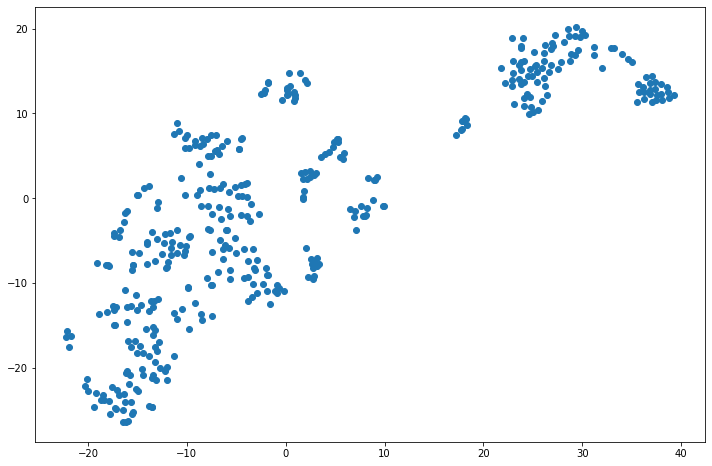

In [2]:
boston = load_boston()
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.



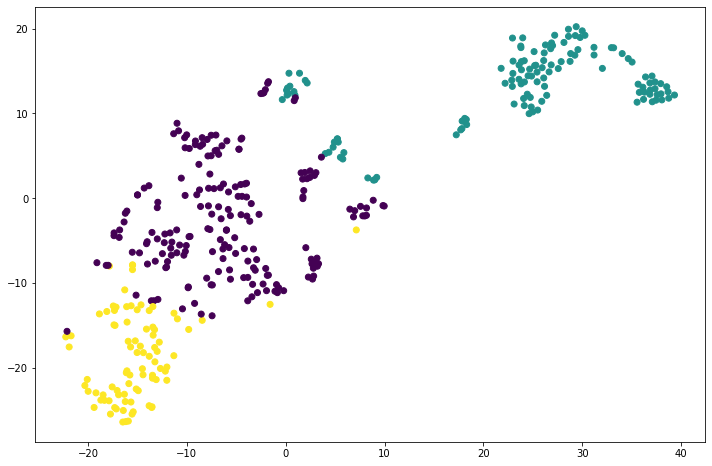

In [3]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [4]:
for cluster in sorted(set(labels_train)):
    price = y_train[labels_train == cluster].price.mean()
    CRIM = X_train[labels_train == cluster].CRIM.mean()
    print(f'Кластер {cluster} -> средние значения: price={price:.5f}, CRIM={CRIM:.5f}')

Кластер 0 -> средние значения: price=24.95812, CRIM=0.42166
Кластер 1 -> средние значения: price=16.16535, CRIM=10.79703
Кластер 2 -> средние значения: price=27.78837, CRIM=0.07357


## Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [5]:
labels_test = kmeans.predict(X_test_scaled)
for cluster in sorted(set(labels_test)):
    price = y_test[labels_test == cluster].price.mean()
    CRIM = X_test[labels_test == cluster].CRIM.mean()
    print(f'Кластер {cluster} -> средние значения: price={price:.5f}, CRIM={CRIM:.5f}')

Кластер 0 -> средние значения: price=21.86078, CRIM=0.26608
Кластер 1 -> средние значения: price=16.43714, CRIM=10.16553
Кластер 2 -> средние значения: price=31.35000, CRIM=0.06206
